# Import Libraries

In [ ]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import six
import random
random.seed(0)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)
import matplotlib.patches as mpatches
import time
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, cohen_kappa_score,auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score 
from imblearn.over_sampling import SMOTE
import copy
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
from sklearn.metrics import roc_auc_score


# **1) Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# About the Dataset
**This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.**

# Data Description


*   **trans_date_trans_time**: date and time of the transaction
*   **cc_num:** credit card number of customer
*   **merchant:** customer is paying to which merchant(like Amazon, Walmart)
*   **category:**
*   **amt:** the amount of transaction
*   **first:** first name of customer
*   **last:** last anme of customer
*   **gender:** gender of the customer
*   **street,city,state:** address of the customer
*   **zip:** zip code of the transaction
*   **lat:** latitude of the customer
*   **long:** longitude of customer
*   **city_pop:** population of the city he is living
*   **job:** job of cus
*   **dob:** date of birth of the customer
*   **trans_num:** unique transaction number for each and every transaction
*   **unix_time:** time of the transaction in Unix( generally not used in our analysis as it is unique mostly)
*   **merch_lat:** merchant lattitude
*   **merch_long:** merchant longitude
*   **is_fraud:** whether transaction is fraud or no (1- fraud, 0- not fraud)



In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/ML Project/fraudTrain.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ML Project/fraudTest.csv")

In [ ]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840000,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.280000,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.672900,-73.536500,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.050000,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.569700,-80.819100,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.190000,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.252900,-85.017000,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
#Drop unnamed column
df_train = df_train.drop(df_train.columns[0], axis=1)
df_test = df_test.drop(df_test.columns[0], axis=1)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# **2) Data Exploration**

# Count missing values in each column

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
df_train.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**There is no null values in the dataset**

# Count duplicated rows

In [ ]:
df_train.duplicated().sum()

0

**There is duplicates in the dataset**

In [ ]:
df_train.shape

(1296675, 22)

In [ ]:
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,417192042079641088.000000,70.351035,48800.671097,38.537622,-90.226335,88824.440563,1349243636.726123,38.537338,-90.226465,0.005789
std,1308806447000789248.000000,160.316039,26893.222476,5.075808,13.759077,301956.360689,12841278.423360,5.109788,13.771091,0.075863
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000
25%,180042946491150.000000,9.650000,26237.000000,34.620500,-96.798000,743.000000,1338750742.500000,34.733572,-96.897276,0.000000
50%,3521417320836166.000000,47.520000,48174.000000,39.354300,-87.476900,2456.000000,1349249747.000000,39.365680,-87.438392,0.000000
75%,4642255475285942.000000,83.140000,72042.000000,41.940400,-80.158000,20328.000000,1359385375.500000,41.957164,-80.236797,0.000000
max,4992346398065154048.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1371816817.000000,67.510267,-66.950902,1.000000


# Some Plots

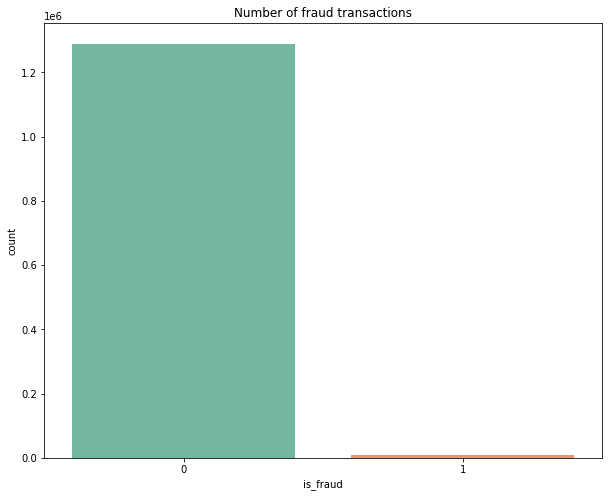

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Number of fraud transactions')
sns.countplot(x = 'is_fraud', data = df_train,  palette = 'Set2')
plt.show()

**The dataset is totally imbalanced.**

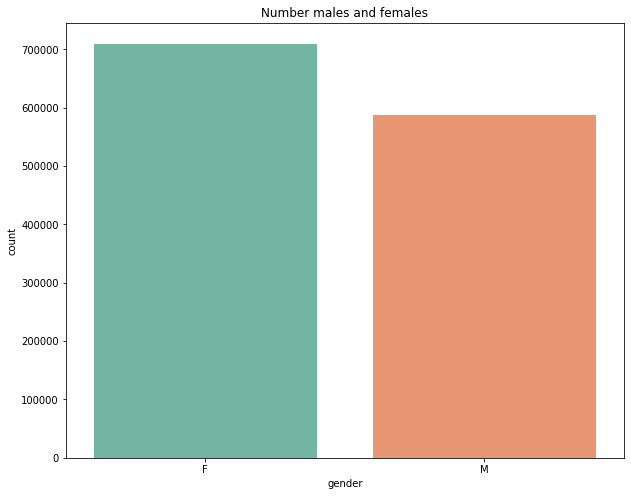

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Number males and females')
sns.countplot(x = 'gender', data = df_train,  palette = 'Set2')
plt.show()

**The number of females is more than males in the dataset.**

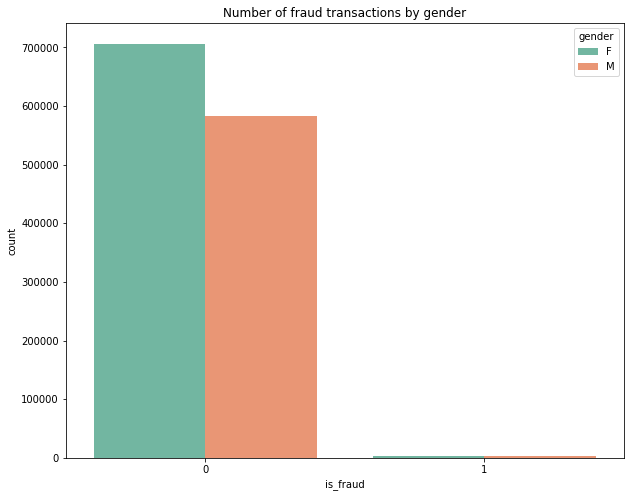

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Number of fraud transactions by gender')
sns.countplot(x = 'is_fraud', hue = 'gender', data = df_train, palette ='Set2')

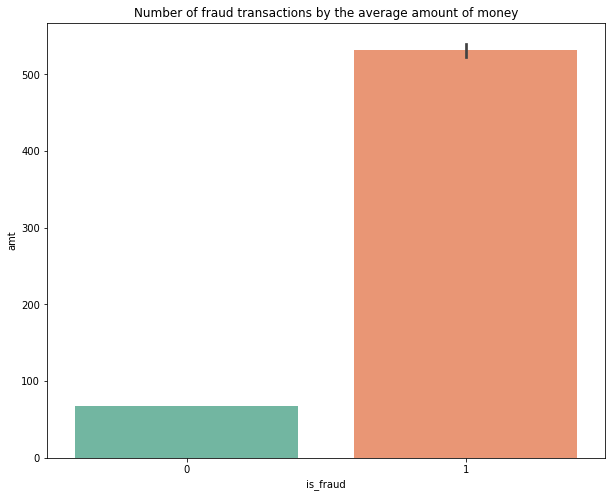

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Number of fraud transactions by the average amount of money')
sns.barplot(x="is_fraud", y='amt', data=df_train,  palette ='Set2')

Text(0, 0.5, 'Count')

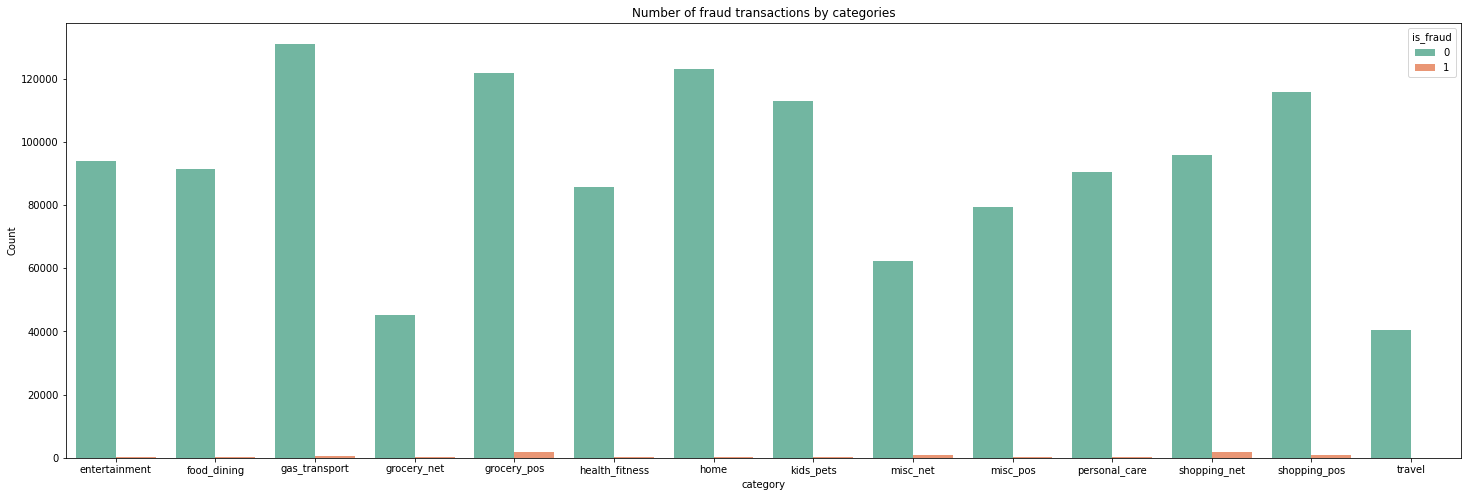

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of fraud transactions by categories')
sns.barplot(x="category", y='cc_num' ,hue="is_fraud", data=df_train.groupby(['category','is_fraud']).agg({'cc_num':'count'}).reset_index(), palette = 'Set2')
plt.ylabel('Count')

In [ ]:
#The number of transactions that occured at each merchant in the dataset
df_train.merchant.value_counts()

fraud_Kilback LLC                              4403
fraud_Cormier LLC                              3649
fraud_Schumm PLC                               3634
fraud_Kuhn LLC                                 3510
fraud_Boyer PLC                                3493
fraud_Dickinson Ltd                            3434
fraud_Cummerata-Jones                          2736
fraud_Kutch LLC                                2734
fraud_Olson, Becker and Koch                   2723
fraud_Stroman, Hudson and Erdman               2721
fraud_Rodriguez Group                          2716
fraud_Jenkins, Hauck and Friesen               2705
fraud_Erdman-Kertzmann                         2705
fraud_Kling Inc                                2687
fraud_Connelly, Reichert and Fritsch           2684
fraud_Friesen-Stamm                            2680
fraud_Prohaska-Murray                          2679
fraud_Huels-Hahn                               2678
fraud_Berge LLC                                2677
fraud_Christ

# **3) Feature Engineering**

In [ ]:
#Change the data typr of dop, trans_date_trans_time to datetime
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

############## Test ###############
df_test['dob'] = pd.to_datetime(df_test['dob'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

In [ ]:
#Calculating the age of customers at the transaction time based on their date of birth
df_train['age'] = (df_train['trans_date_trans_time'] - df_train['dob'])/np.timedelta64(1,'Y')
df_train['age'] = np.round(df_train['age'])

############## Test ###############
df_test['age'] = (df_test['trans_date_trans_time'] - df_test['dob'])/np.timedelta64(1,'Y')
df_test['age'] = np.round(df_test['age'])

In [ ]:
df_train['age'].describe()

count   1296675.000000
mean         45.999860
std          17.396256
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age, dtype: float64

**The age's range of most of customers in the dataset is 33-57 year.**

In [ ]:
df_test['age'].describe()

count   555719.000000
mean        46.887567
std         17.434172
min         15.000000
25%         33.000000
50%         45.000000
75%         58.000000
max         96.000000
Name: age, dtype: float64

In [ ]:
# Obtaining some statistics from trans_date_trans_time column.
df_train['trans_day'] = df_train['trans_date_trans_time'].dt.day_name()
df_train['trans_month'] = df_train['trans_date_trans_time'].dt.month_name()
df_train['trans_year_month'] = df_train['trans_date_trans_time'].dt.to_period('M')

df_train['trans_hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['trans_dayN'] = df_train['trans_date_trans_time'].dt.day
df_train['trans_yearN'] = df_train['trans_date_trans_time'].dt.year
df_train['trans_monthN'] = df_train['trans_date_trans_time'].dt.month


############## Test ###############
# Obtaining some statistics from trans_date_trans_time column for Test Data.
df_test['trans_day'] = df_test['trans_date_trans_time'].dt.day_name()
df_test['trans_month'] = df_test['trans_date_trans_time'].dt.month_name()
df_test['trans_year_month'] = df_test['trans_date_trans_time'].dt.to_period('M')

df_test['trans_hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['trans_dayN'] = df_test['trans_date_trans_time'].dt.day
df_test['trans_yearN'] = df_test['trans_date_trans_time'].dt.year
df_test['trans_monthN'] = df_test['trans_date_trans_time'].dt.month


In [ ]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_day,trans_month,trans_year_month,trans_hour,trans_dayN,trans_yearN,trans_monthN
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31.000000,Tuesday,January,2019-01,0,1,2019,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41.000000,Tuesday,January,2019-01,0,1,2019,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57.000000,Tuesday,January,2019-01,0,1,2019,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52.000000,Tuesday,January,2019-01,0,1,2019,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33.000000,Tuesday,January,2019-01,0,1,2019,1


In [ ]:
df_train['trans_hour'].describe()

count   1296675.000000
mean         12.804858
std           6.817824
min           0.000000
25%           7.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: trans_hour, dtype: float64

**Most transactions occured at the period between 7:00 and 19:00.**

In [ ]:
df_train['trans_day'].describe()

count     1296675
unique          7
top        Monday
freq       254282
Name: trans_day, dtype: object

**Most transactions in the dataset occured on Monday.**

In [ ]:
df_train['trans_month'].describe()

count     1296675
unique         12
top           May
freq       146875
Name: trans_month, dtype: object

**Most transactions in the dataset occured in May.**

In [ ]:
df_train['trans_year_month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1296670    2020-06
1296671    2020-06
1296672    2020-06
1296673    2020-06
1296674    2020-06
Name: trans_year_month, Length: 1296675, dtype: period[M]

In [ ]:
df_train['trans_year_month'].describe()

count     1296675
unique         18
top       2019-12
freq       141060
Name: trans_year_month, dtype: object

**Most transactions in the dataset occured in 2019-12.**

In [ ]:
df_train['trans_yearN'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: trans_yearN, dtype: int64

In [ ]:
df_train['trans_yearN'].describe()

count   1296675.000000
mean       2019.286753
std           0.452245
min        2019.000000
25%        2019.000000
50%        2019.000000
75%        2020.000000
max        2020.000000
Name: trans_yearN, dtype: float64

# Using Longitutde and Latitude to find the distance between Customers and Merchants

In [ ]:
def distance(lat1, lon1, lat2, lon2):

    earth_radius=6371
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [ ]:
df_train['distance'] = distance(df_train['lat'], df_train['long'], df_train['merch_lat'], df_train['merch_long'])

In [ ]:
############## Test ###############
df_test['distance'] = distance(df_test['lat'], df_test['long'], df_test['merch_lat'], df_test['merch_long'])

In [ ]:
df_train['distance'].describe()

count   1296675.000000
mean         76.114651
std          29.116935
min           0.022255
25%          55.334913
50%          78.231751
75%          98.503268
max         152.117173
Name: distance, dtype: float64

In [ ]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_day,trans_month,trans_year_month,trans_hour,trans_dayN,trans_yearN,trans_monthN,distance
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31.000000,Tuesday,January,2019-01,0,1,2019,1,78.597568
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41.000000,Tuesday,January,2019-01,0,1,2019,1,30.212176
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57.000000,Tuesday,January,2019-01,0,1,2019,1,108.206083
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52.000000,Tuesday,January,2019-01,0,1,2019,1,95.673231
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33.000000,Tuesday,January,2019-01,0,1,2019,1,77.556744


# **4) Data Visualization**

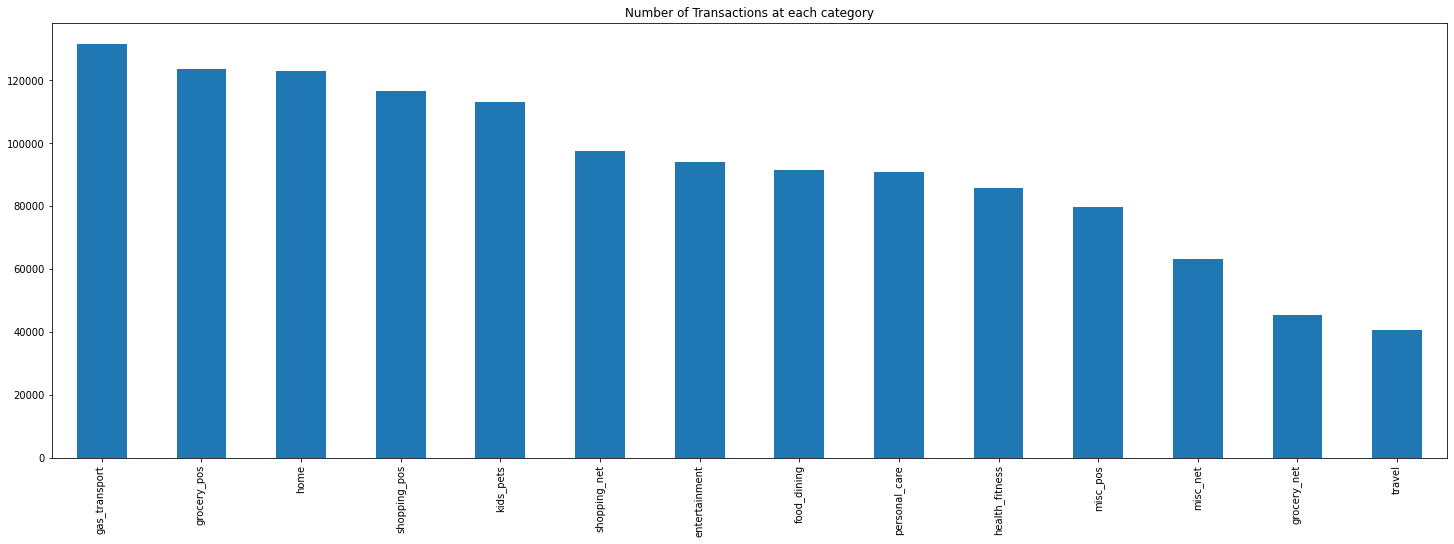

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of Transactions at each category')
df_train['category'].value_counts().plot.bar()


*   **Customers use their Credit Cards Mostly For the Gas_transport purpose.**
*   **Customers use their Credit Cards Leastly For the Travelling purposes.**

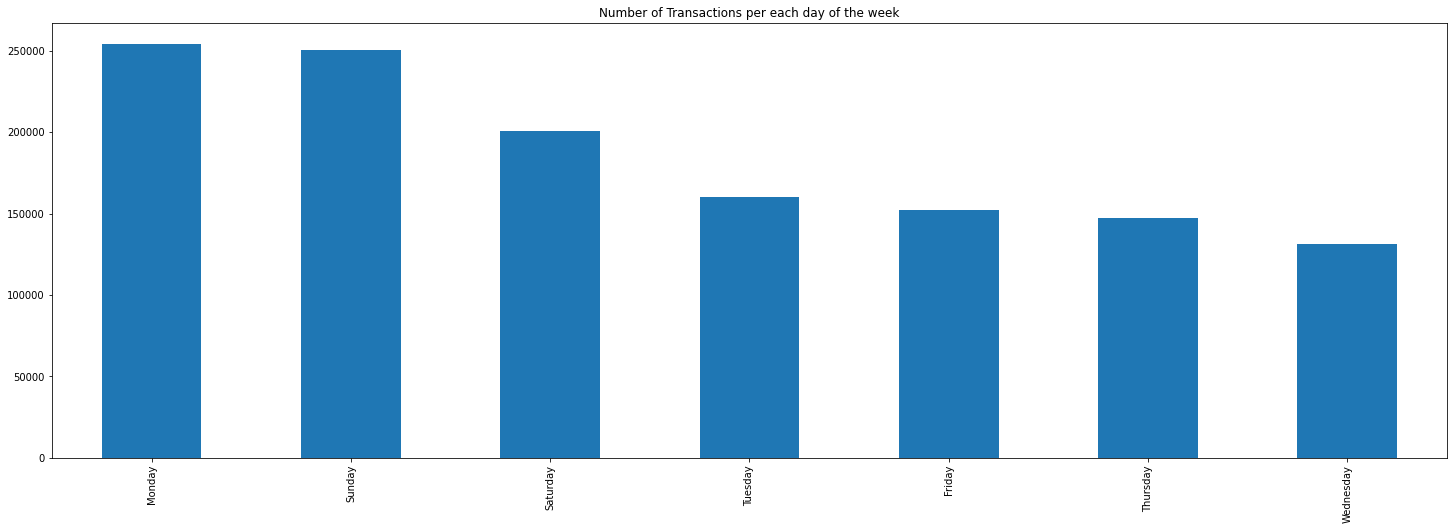

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of Transactions per each day of the week')
df_train['trans_day'].value_counts().plot.bar();


*   **Customers use their Credit Cards Mostly on Mondays and Sundays.**
*   **Customers use their Credit Cards Leastly on Wednesdays.**

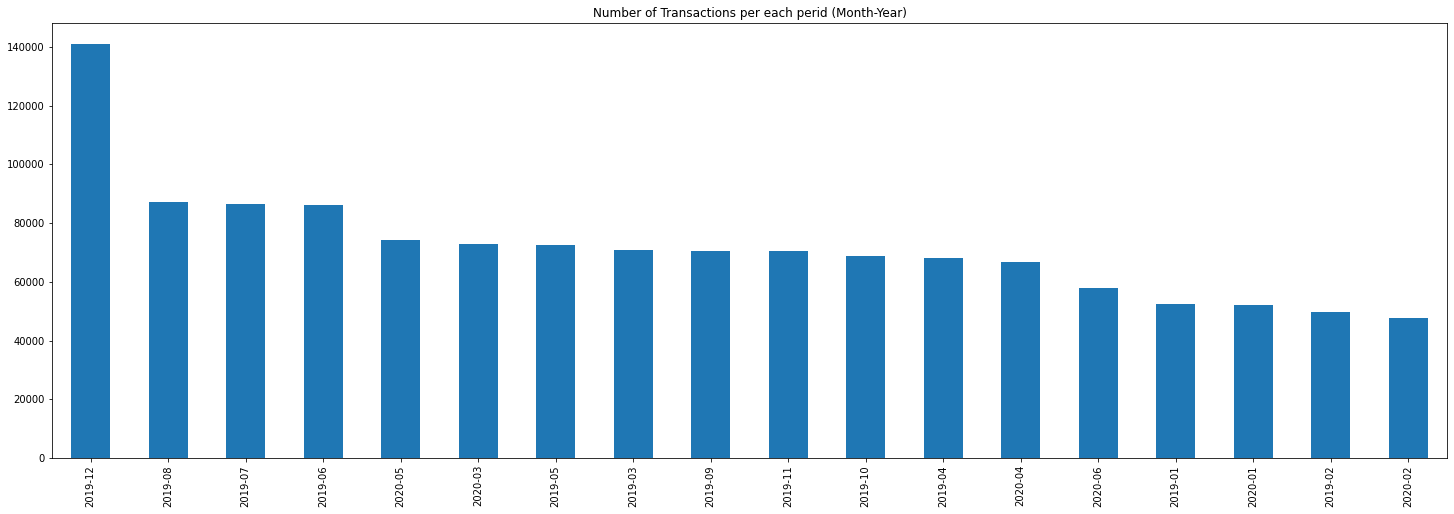

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of Transactions per each perid (Month-Year)')
df_train['trans_year_month'].value_counts().plot.bar()

*   **Customers use their Credit Cards Mostly in December 2019.**
*   **Customers use their Credit Cards Leastly in February 2020.**

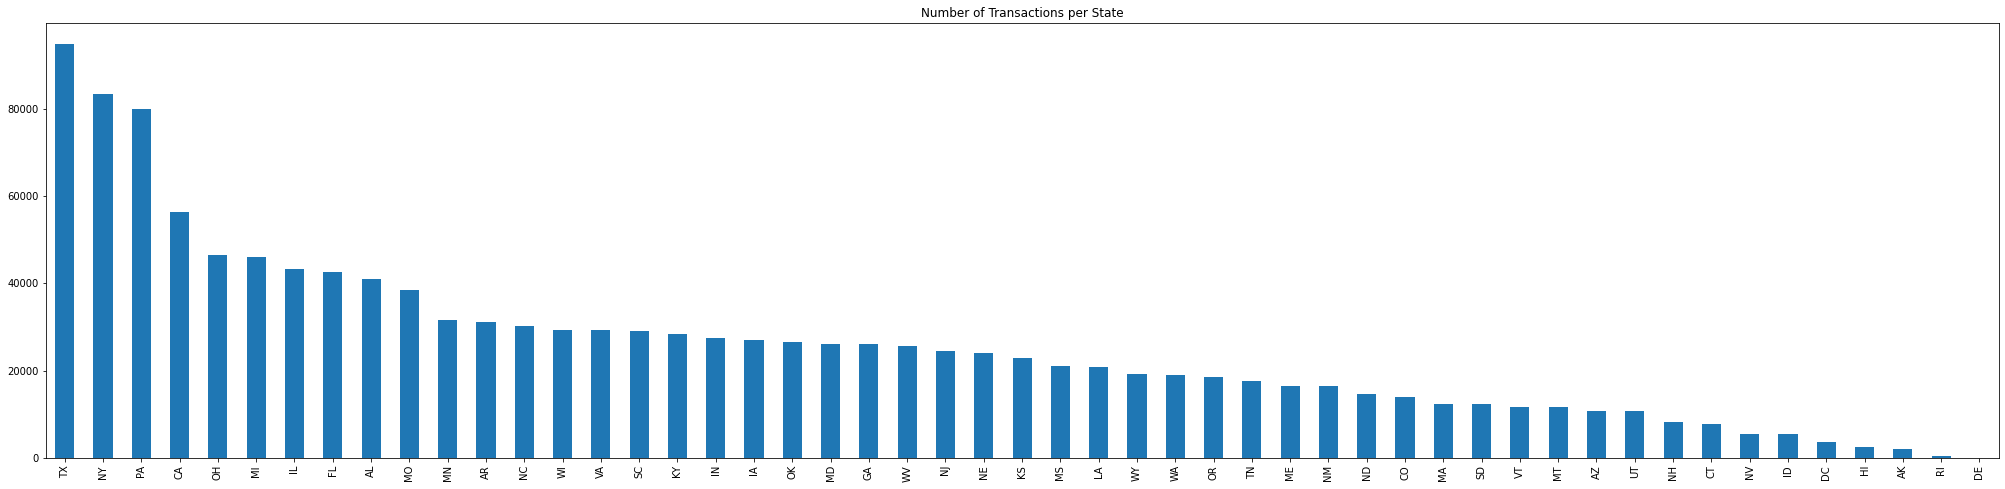

In [ ]:
plt.figure(figsize=(35,8))
plt.title('Number of Transactions per State')
df_train['state'].value_counts().plot.bar()

*   **Customers of TX State use their Credit Cards Mostly.**
*   **Customers of DE State use their Credit Cards Leastly.**

In [ ]:
df_train.job.value_counts()

Film/video editor                                              9779
Exhibition designer                                            9199
Naval architect                                                8684
Surveyor, land/geomatics                                       8680
Materials engineer                                             8270
Designer, ceramics/pottery                                     8225
Systems developer                                              7700
IT trainer                                                     7679
Financial adviser                                              7659
Environmental consultant                                       7547
Chartered public finance accountant                            7210
Scientist, audiological                                        7174
Chief Executive Officer                                        7172
Copywriter, advertising                                        7146
Comptroller                                     

*   **Film/video editors use their Credit Cards Mostly.**
*   **Warehouse managers, Contracting civil engineers, Ship brokers use their Credit Cards Leastly.**

In [ ]:
df_train['age'].describe()

count   1296675.000000
mean         45.999860
std          17.396256
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age, dtype: float64

*   **33-57 age people are 50% of our customers.**
*   **Minimum age of customer count is 14.**
*   **Maximum age of customer count is 96**

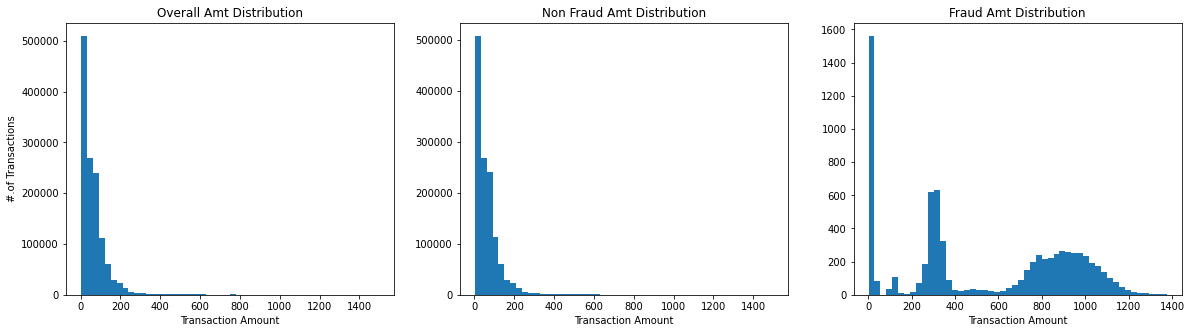

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df_train[df_train['amt']<=1500]['amt'], bins=50)
ax[1].hist(df_train[(df_train['is_fraud']==0) & (df_train['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df_train[(df_train['is_fraud']==1) & (df_train['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

In [ ]:
## Fraud Transactions
df_fraud_transactions = df_train[df_train['is_fraud']==1]
df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


<BarContainer object of 2 artists>

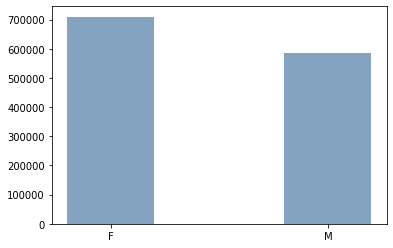

In [ ]:
df_gender = df_train[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']
df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6), width = 0.4)

In [ ]:
df_fraud_gender = df_train[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']
df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner', left_on='Gender',right_on='Gender')
df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100

df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,706128,709863,99.473842
1,F,1,3735,709863,0.526158
2,M,0,583041,586812,99.357375
3,M,1,3771,586812,0.642625


# Ordinal Encoding 

In [ ]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_day,trans_month,trans_year_month,trans_hour,trans_dayN,trans_yearN,trans_monthN,distance
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31.000000,Tuesday,January,2019-01,0,1,2019,1,78.597568
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41.000000,Tuesday,January,2019-01,0,1,2019,1,30.212176
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57.000000,Tuesday,January,2019-01,0,1,2019,1,108.206083
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52.000000,Tuesday,January,2019-01,0,1,2019,1,95.673231
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33.000000,Tuesday,January,2019-01,0,1,2019,1,77.556744


In [ ]:
ord_enc = OrdinalEncoder()
df_train["categoryE"] = ord_enc.fit_transform(df_train[["category"]])
df_train["genderE"] = ord_enc.fit_transform(df_train[["gender"]])
df_train["trans_dayE"] = ord_enc.fit_transform(df_train[["trans_day"]])
df_train["jobE"] = ord_enc.fit_transform(df_train[["job"]])

############### Test ##############
df_test["categoryE"] = ord_enc.fit_transform(df_test[["category"]])
df_test["genderE"] = ord_enc.fit_transform(df_test[["gender"]])
df_test["trans_dayE"] = ord_enc.fit_transform(df_test[["trans_day"]])
df_test["jobE"] = ord_enc.fit_transform(df_test[["job"]])

In [ ]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_day,trans_month,trans_year_month,trans_hour,trans_dayN,trans_yearN,trans_monthN,distance,categoryE,genderE,trans_dayE,jobE
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31.000000,Tuesday,January,2019-01,0,1,2019,1,78.597568,8.000000,0.000000,5.000000,370.000000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41.000000,Tuesday,January,2019-01,0,1,2019,1,30.212176,4.000000,0.000000,5.000000,428.000000
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57.000000,Tuesday,January,2019-01,0,1,2019,1,108.206083,0.000000,1.000000,5.000000,307.000000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52.000000,Tuesday,January,2019-01,0,1,2019,1,95.673231,2.000000,1.000000,5.000000,328.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33.000000,Tuesday,January,2019-01,0,1,2019,1,77.556744,9.000000,1.000000,5.000000,116.000000


In [ ]:
#One hot encoding
#category_onehot = pd.get_dummies(df_train.category, prefix='category', drop_first=True)
#gender_onehot = pd.get_dummies(df_train.gender, prefix='gender', drop_first=True)
#trans_day_onehot = pd.get_dummies(df_train.trans_day, prefix='week',drop_first=True)

#df = pd.concat([df_train, category_onehot,gender_onehot,trans_day_onehot, trans_month_onehot], axis=1)

In [ ]:
df = copy.deepcopy(df_train)
df_T = copy.deepcopy(df_test)

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_day,trans_month,trans_year_month,trans_hour,trans_dayN,trans_yearN,trans_monthN,distance,categoryE,genderE,trans_dayE,jobE
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31.000000,Tuesday,January,2019-01,0,1,2019,1,78.597568,8.000000,0.000000,5.000000,370.000000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41.000000,Tuesday,January,2019-01,0,1,2019,1,30.212176,4.000000,0.000000,5.000000,428.000000
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57.000000,Tuesday,January,2019-01,0,1,2019,1,108.206083,0.000000,1.000000,5.000000,307.000000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52.000000,Tuesday,January,2019-01,0,1,2019,1,95.673231,2.000000,1.000000,5.000000,328.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33.000000,Tuesday,January,2019-01,0,1,2019,1,77.556744,9.000000,1.000000,5.000000,116.000000


In [ ]:
dropped_cols = ['trans_date_trans_time', 'cc_num','merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num', 'trans_day', 'trans_month', 'trans_year_month']
df.drop(dropped_cols,inplace=True,axis=1)

####### Test #########
df_T.drop(dropped_cols,inplace=True,axis=1)

In [ ]:
df.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,trans_hour,trans_dayN,trans_yearN,trans_monthN,distance,categoryE,genderE,trans_dayE,jobE
0,4.970000,28654,36.078800,-81.178100,3495,1325376018,36.011293,-82.048315,0,31.000000,0,1,2019,1,78.597568,8.000000,0.000000,5.000000,370.000000
1,107.230000,99160,48.887800,-118.210500,149,1325376044,49.159047,-118.186462,0,41.000000,0,1,2019,1,30.212176,4.000000,0.000000,5.000000,428.000000
2,220.110000,83252,42.180800,-112.262000,4154,1325376051,43.150704,-112.154481,0,57.000000,0,1,2019,1,108.206083,0.000000,1.000000,5.000000,307.000000
3,45.000000,59632,46.230600,-112.113800,1939,1325376076,47.034331,-112.561071,0,52.000000,0,1,2019,1,95.673231,2.000000,1.000000,5.000000,328.000000
4,41.960000,24433,38.420700,-79.462900,99,1325376186,38.674999,-78.632459,0,33.000000,0,1,2019,1,77.556744,9.000000,1.000000,5.000000,116.000000


In [ ]:
df_T.corr()['is_fraud']

amt             0.182267
zip            -0.002271
lat             0.005863
long           -0.000972
city_pop       -0.004910
unix_time      -0.013066
merch_lat       0.005812
merch_long     -0.001060
is_fraud        1.000000
age             0.007452
trans_hour      0.011686
trans_dayN     -0.009203
trans_yearN          nan
trans_monthN   -0.011748
distance        0.000233
categoryE       0.016980
genderE         0.000748
trans_dayE      0.002608
jobE           -0.005074
Name: is_fraud, dtype: float64

In [ ]:
df.shape

(1296675, 19)

In [ ]:
df.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'trans_hour', 'trans_dayN',
       'trans_yearN', 'trans_monthN', 'distance', 'categoryE', 'genderE',
       'trans_dayE', 'jobE'],
      dtype='object')

In [ ]:
df_T.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'trans_hour', 'trans_dayN',
       'trans_yearN', 'trans_monthN', 'distance', 'categoryE', 'genderE',
       'trans_dayE', 'jobE'],
      dtype='object')

# Splitting Train and Test Data 

In [ ]:
cols = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'age', 'trans_hour', 'trans_dayN',
       'trans_yearN', 'trans_monthN', 'distance', 'jobE', 'categoryE',
       'genderE', 'trans_dayE']

X = df[cols]   
y = df['is_fraud']

#split data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)

############ Test ##########
X_T = df_T[cols]   
y_T = df_T['is_fraud']

In [ ]:
X.shape

(1296675, 18)

In [ ]:
y.shape

(1296675,)

# SMOTE



*   **As the dataset is extremly imbalanced, we will apply oversampling to balance the dataset.**
*   **We will try the chosen models on both the imbalanced, and balanced datasets.**




In [ ]:
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())

Feature/label dataset for training before applying SMOTE:  (1037340, 18) (1037340,)
Feature/label dataset for training after applying SMOTE:  (2062688, 18) (2062688,)
Distribution of label values after applying SMOTE:
 1    1031344
0    1031344
Name: is_fraud, dtype: int64


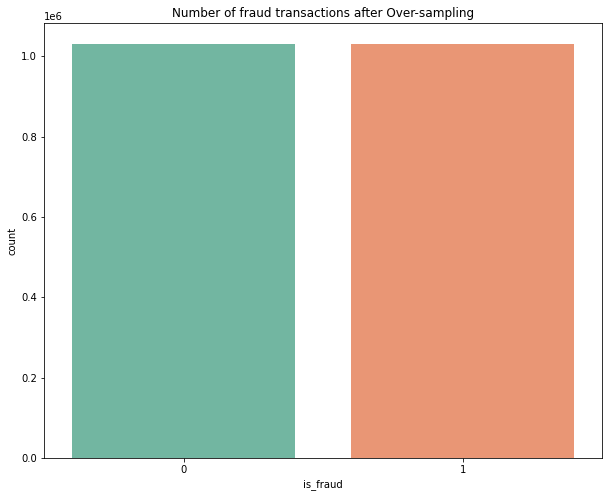

In [ ]:
df_SMOTE = pd.concat([X_train_smote, y_train_smote], axis=1)
plt.figure(figsize=(10,8))
plt.title('Number of fraud transactions after Over-sampling')
sns.countplot(x = 'is_fraud', data = df_SMOTE,  palette = 'Set2')
plt.show()

**The dataset is balanced after oversampling**

# Applying The Models on the Imbalanced Datasets (Without SMOTE):

In [ ]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

# 1) Logistic Regression:

Evaluation of Logistic Regression Model before SMOT
Accuracy: 0.99418
Precision: 0.00000
Recall: 0.00000
F1-score: 0.00000


Text(0.5, 15.0, 'Predicted Label')

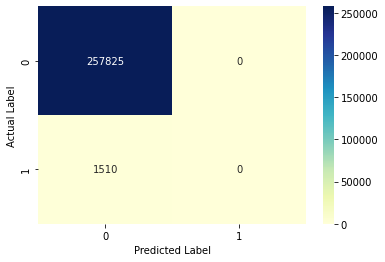

In [ ]:
LR1 = LogisticRegression(solver = 'liblinear', max_iter= 1000)
LR1.fit(X_train,y_train)
y_pred_LR = LR1.predict(X_test)
LR_cnf_matrix = confusion_matrix(y_test, y_pred_LR)
print('Evaluation of Logistic Regression Model before SMOT')
metrics(y_test, y_pred_LR.round())
sns.heatmap(pd.DataFrame(LR_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Logistic Regression with Feature Selection: RFE

In [ ]:
LR = LogisticRegression(solver = 'liblinear', max_iter= 1000)
rfe = RFE(estimator= LR, n_features_to_select=4)
rfe = rfe.fit(X_train, y_train)
selected_features= list(X_train.columns[rfe.support_])

# summarize the selection of the attributes
print(selected_features)

['zip', 'city_pop', 'unix_time', 'trans_yearN']


In [ ]:
#split data based on the choosen features
X_RFE = X[selected_features]

X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(X_RFE, y, test_size = 0.2, random_state = 101)

Evaluation of Logistic Regression with Selected Features Model before SMOT
Accuracy: 0.99421
Precision: 0.00000
Recall: 0.00000
F1-score: 0.00000


Text(0.5, 15.0, 'Predicted Label')

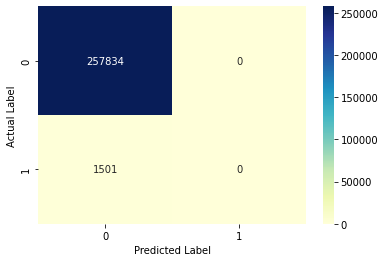

In [ ]:
#test
LR.fit(X_train_RFE,y_train_RFE)
y_pred_LR = LR.predict(X_test_RFE)
LR_cnf_matrix = confusion_matrix(y_test_RFE, y_pred_LR)
print('Evaluation of Logistic Regression with Selected Features Model before SMOT')
metrics(y_test_RFE, y_pred_LR.round())
sns.heatmap(pd.DataFrame(LR_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


*   **Logistic Regression Model even after Feature Selection didn't perform well on the imbalanced dataset.**



# Logistic Regression after Hyperparameter Tuning

Evaluation of Logistic Regression Model before SMOT

Accuracy: 0.99354
Precision: 0.00000
Recall: 0.00000
F1-score: 0.00000


Text(0.5, 15.0, 'Predicted Label')

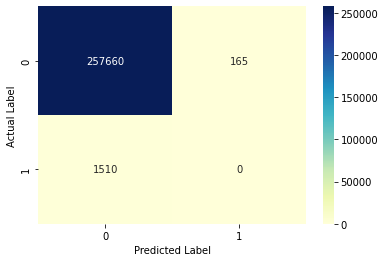

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.1)
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
LR_cnf_matrix = confusion_matrix(y_test, y_test_pred)
print('Evaluation of Logistic Regression Model before SMOT')
print()
metrics(y_test, y_test_pred.round())
LR_f1_score = f1_score(y_test, y_test_pred)
sns.heatmap(pd.DataFrame(LR_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# **Testing Logistic Regression Model on Fraud_test.csv**

Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv
Accuracy: 0.99552
Precision: 0.00000
Recall: 0.00000
F1-score: 0.00000


Text(0.5, 15.0, 'Predicted Label')

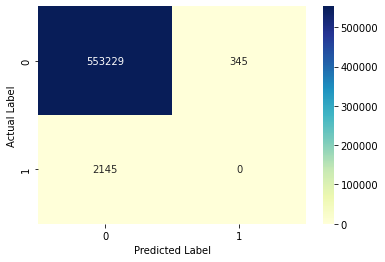

In [ ]:
y_pred_T = LR.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# 2) Decision Tree Classifier

Evaluation of Decision Tree Classifier Model before SMOT
Accuracy: 0.99780
Precision: 0.79597
Recall: 0.83709
F1-score: 0.81601


Text(0.5, 15.0, 'Predicted Label')

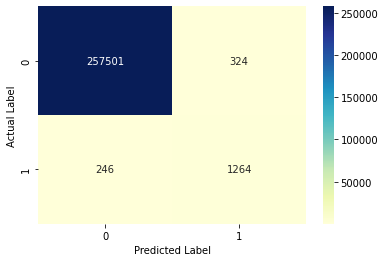

In [ ]:
Model_dt = DecisionTreeClassifier()
Model_dt.fit(X_train, y_train)
y_pred = Model_dt.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Decision Tree Classifier Model before SMOT')
metrics(y_test, y_pred.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Decision Tree Classifier with Hyperparameter Tuning: GridSearchCV

In [ ]:
clf = tree.DecisionTreeClassifier()
print("Start fitting the data")
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [2,5,7,10,12]},
              {'min_samples_leaf': [2,5,10,12]}]
dtree = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

dtree.fit(X_train,y_train)
predictions2 = dtree.predict(X_test)
fscore = f1_score(y_test, predictions2)
dtree_score=np.round(fscore*100,2)

Start fitting the data


In [ ]:
print(f"Best Parameters {dtree.best_params_}")
print(f"F1 Score {dtree_score}")

Best Parameters {'criterion': 'entropy', 'max_depth': 10}
F1 Score 86.01


**Building the model using best parameters**

Evaluation of Decision Tree Classifier Model before SMOT
Accuracy: 0.99848
Precision: 0.92595
Recall: 0.80331
F1-score: 0.86028


Text(0.5, 15.0, 'Predicted Label')

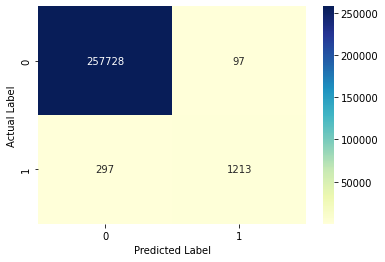

In [ ]:
Model_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth = 10)
Model_dt.fit(X_train, y_train)
y_pred = Model_dt.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Decision Tree Classifier Model before SMOT')
metrics(y_test, y_pred.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# **Testing Decision Tree Classifier Model on Fraud_test.csv**

Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv
Accuracy: 0.99872
Precision: 0.87837
Recall: 0.77436
F1-score: 0.82309


Text(0.5, 15.0, 'Predicted Label')

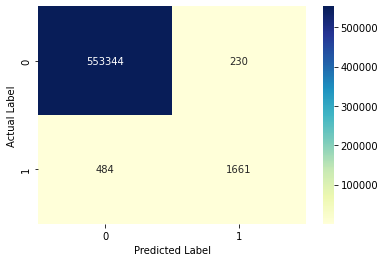

In [ ]:
y_pred_T = Model_dt.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# 3) Random Forest

Evaluation of Random Forest Model before SMOT
Accuracy: 0.99851
Precision: 0.97386
Recall: 0.76490
F1-score: 0.85682


Text(0.5, 15.0, 'Predicted Label')

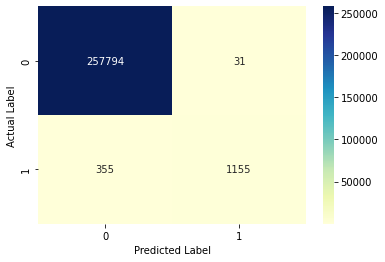

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Random Forest Model before SMOT')
metrics(y_test, y_pred.round())
rf_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Random Forest with Hyperparameter Tuning: GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf1 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 320 candidates, totalling 960 fits


In [ ]:
grid_search.best_params_

# **Testing Random Forest Classifier Model on Fraud_test.csv**

Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv
Accuracy: 0.99856
Precision: 0.95964
Recall: 0.65408
F1-score: 0.77793


Text(0.5, 15.0, 'Predicted Label')

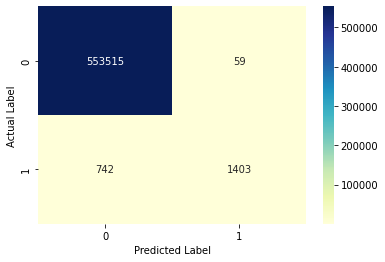

In [ ]:
y_pred_T = rf.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# 4) AdaBoost

Evaluation of Random Forest Model before SMOT
Accuracy: 0.99598
Precision: 0.75408
Recall: 0.45894
F1-score: 0.57061


Text(0.5, 15.0, 'Predicted Label')

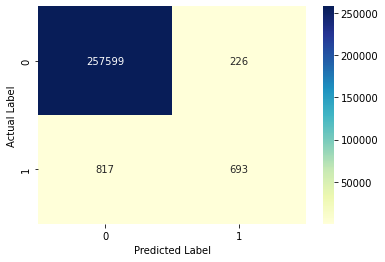

In [ ]:
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train, y_train)
y_pred = adabc.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Random Forest Model before SMOT')
metrics(y_test, y_pred.round())
rf_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



# **Testing AdaBoost Classifier Model on Fraud_test.csv**

Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv
Accuracy: 0.99691
Precision: 0.61489
Recall: 0.53147
F1-score: 0.57014


Text(0.5, 15.0, 'Predicted Label')

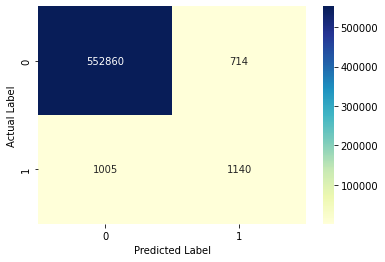

In [ ]:
y_pred_T = adabc.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# 5) Bagging

Evaluation of Random Forest Model before SMOT
Accuracy: 0.99871
Precision: 0.94677
Recall: 0.82450
F1-score: 0.88142


Text(0.5, 15.0, 'Predicted Label')

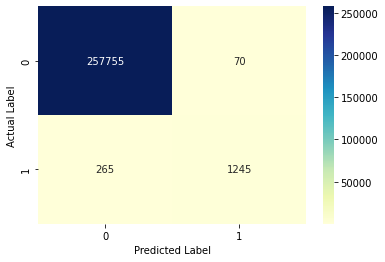

In [ ]:
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train, y_train)
y_pred = bgc.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Random Forest Model before SMOT')
metrics(y_test, y_pred.round())
rf_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


# **Testing Bagging Classifier Model on Fraud_test.csv**

Evaluation of bagging Classifier Model before SMOT on Fraud_test.csv
Accuracy: 0.99870
Precision: 0.86649
Recall: 0.78368
F1-score: 0.82301


Text(0.5, 15.0, 'Predicted Label')

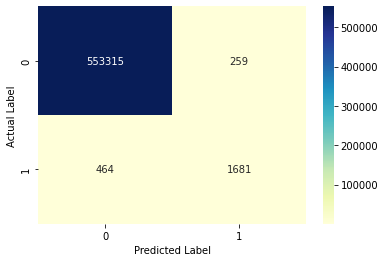

In [ ]:
y_pred_T = bgc.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of bagging Classifier Model before SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



---

---



---





# Applying The Models on the Balanced Datasets (With SMOTE):

# 1) Logistic Regression:

Evaluation of Logistic Regression Model after SMOT
Accuracy: 0.95482
Precision: 0.09142
Recall: 0.75629
F1-score: 0.16312


Text(0.5, 15.0, 'Predicted Label')

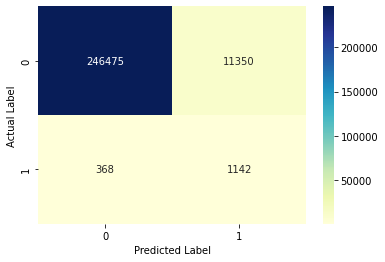

In [ ]:
LRS = LogisticRegression(solver = 'liblinear', max_iter= 1000)
LRS.fit(X_train_smote,y_train_smote)
y_pred_LRS = LRS.predict(X_test)
LRS_cnf_matrix = confusion_matrix(y_test, y_pred_LRS)
print('Evaluation of Logistic Regression Model after SMOT')
metrics(y_test, y_pred_LRS.round())
sns.heatmap(pd.DataFrame(LRS_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = RandomizedSearchCV(estimator = LR, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_smote, y_train_smote)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.883606 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
0.511745 (0.000755) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
0.883568 (0.000385) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.511745 (0.000755) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.511745 (0.000755) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.883606 (0.000400) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
0.883575 (0.000388) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}
0.883112 (0.000478) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.883102 (0.000406) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.883584 (0.000452) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.511745 (0.000755) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}


# **Testing Logistic Regression Model on Fraud_test.csv**

Evaluation of Decision Tree Classifier Model after SMOT on Fraud_test.csv
Accuracy: 0.96678
Precision: 0.08160
Recall: 0.74172
F1-score: 0.14702


Text(0.5, 15.0, 'Predicted Label')

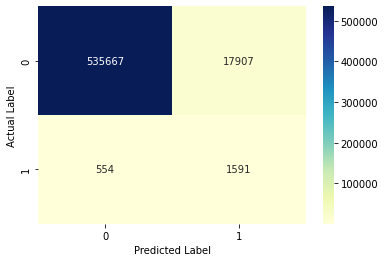

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.1)
LR.fit(X_train_smote,y_train_smote)
y_test_pred = LR.predict(X_T)
LR_cnf_matrix = confusion_matrix(y_T, y_test_pred)
print('Evaluation of Decision Tree Classifier Model after SMOT on Fraud_test.csv')
metrics(y_T, y_test_pred.round())
sns.heatmap(pd.DataFrame(LR_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# 2) Decision Tree Classifier

Evaluation of Decision Tree Model After SMOT
Accuracy: 0.99683
Precision: 0.69265
Recall: 0.81788
F1-score: 0.75008


Text(0.5, 15.0, 'Predicted Label')

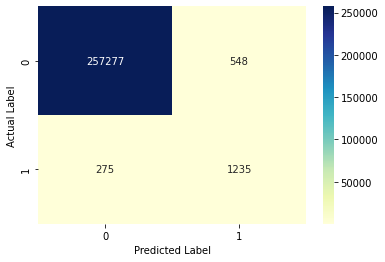

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
y_pred = dt.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Decision Tree Model After SMOT')
metrics(y_test, y_pred.round())
dt_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Decision Tree Classifier with Hyperparameter Tuning: GridSearchCV

In [ ]:
clf = tree.DecisionTreeClassifier()
print("Start fitting the data")
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [2,5,7,10,12, 20, 50, 100, 150]},
              {'min_samples_leaf': [2,5,10,12, 20]}]
dtree = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

dtree.fit(X_train_smote, y_train_smote)
predictions2 = dtree.predict(X_test)
fscore = f1_score(y_test, predictions2)
dtree_score=np.round(fscore*100,2)

Start fitting the data


In [ ]:
print(f"Best Parameters {dtree.best_params_}")
print(f"F1 Score {dtree_score}")


Best Parameters {'min_samples_leaf': 2}
F1 Score 76.59


In [ ]:
print(f"Best Parameters {dtree.best_estimator_}")

Best Parameters DecisionTreeClassifier(min_samples_leaf=2)


**Building the model using best parameters**

Evaluation of Decision Tree Classifier Model after SMOT and Grid Search
Accuracy: 0.99746
Precision: 0.76730
Recall: 0.80795
F1-score: 0.78710


Text(0.5, 15.0, 'Predicted Label')

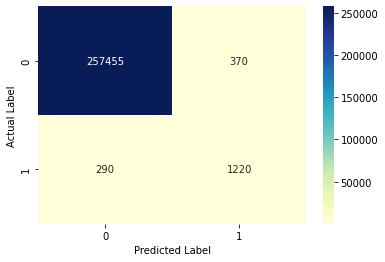

In [ ]:
Model_dt_S = DecisionTreeClassifier(criterion= 'entropy', max_depth = 150, min_samples_leaf=2)
Model_dt_S.fit(X_train_smote, y_train_smote)
y_pred = Model_dt_S.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Decision Tree Classifier Model after SMOT and Grid Search')
metrics(y_test, y_pred.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# **Testing Decision Tree Classifier Model on Fraud_test.csv**

Evaluation of Decision Tree Classifier Model after SMOT on Fraud_test.csv
Accuracy: 0.99698
Precision: 0.58432
Recall: 0.75758
F1-score: 0.65976


Text(0.5, 15.0, 'Predicted Label')

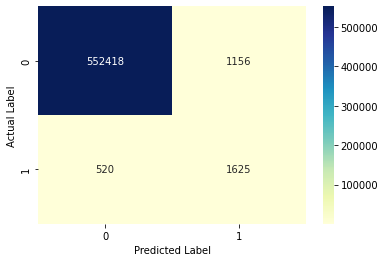

In [ ]:
y_pred_T = Model_dt_S.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of Decision Tree Classifier Model after SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Evaluation of Decision Tree Classifier Model after SMOT on Fraud_test.csv Without GridSearch
Accuracy: 0.98706
Precision: 0.18483
Recall: 0.68951
F1-score: 0.29151


Text(0.5, 15.0, 'Predicted Label')

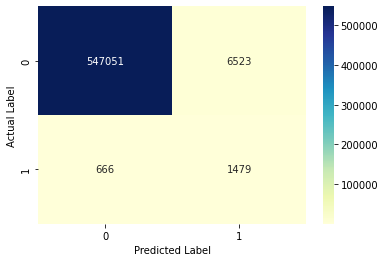

In [ ]:
y_pred_T = dt.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of Decision Tree Classifier Model after SMOT on Fraud_test.csv Without GridSearch')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# 3) Random Forest

Evaluation of Random Forest Model After SMOT
Accuracy: 0.99819
Precision: 0.86994
Recall: 0.81060
F1-score: 0.83922


Text(0.5, 15.0, 'Predicted Label')

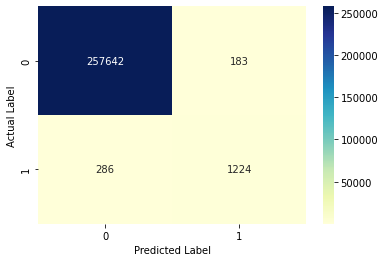

In [ ]:
rf_S = RandomForestClassifier()
rf_S.fit(X_train_smote, y_train_smote)
y_pred = rf_S.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Random Forest Model After SMOT')
metrics(y_test, y_pred.round())
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Random Forest with Hyperparameter Tuning: GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf1 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 320 candidates, totalling 960 fits


In [ ]:
grid_search.best_params_

**Building the model using best parameters**

# **Testing Random Forest Classifier Model on Fraud_test.csv**

Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv
Accuracy: 0.99812
Precision: 0.87791
Recall: 0.59674
F1-score: 0.71052


Text(0.5, 15.0, 'Predicted Label')

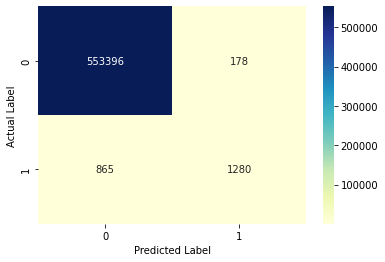

In [ ]:
y_pred_T = rf_S.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# 4) AdaBoost

Evaluation of Random Forest Model before SMOT
Accuracy: 0.97283
Precision: 0.14595
Recall: 0.75563
F1-score: 0.24464


Text(0.5, 15.0, 'Predicted Label')

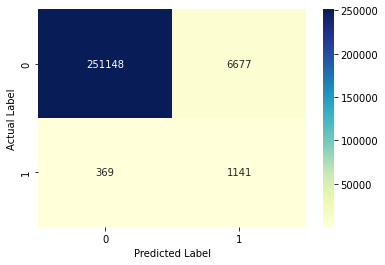

In [ ]:
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
adabc1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc1.fit(X_train_smote, y_train_smote)
y_pred = adabc1.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Random Forest Model before SMOT')
metrics(y_test, y_pred.round())
rf_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



# **Testing AdaBoost Classifier Model on Fraud_test.csv**

Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv
Accuracy: 0.97625
Precision: 0.11124
Recall: 0.73706
F1-score: 0.19330


Text(0.5, 15.0, 'Predicted Label')

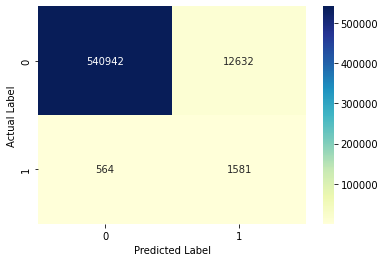

In [ ]:
y_pred_T = adabc1.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of Decision Tree Classifier Model before SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# 5) Bagging

Evaluation of bagging Model before SMOT
Accuracy: 0.99806
Precision: 0.83906
Recall: 0.82517
F1-score: 0.83205


Text(0.5, 15.0, 'Predicted Label')

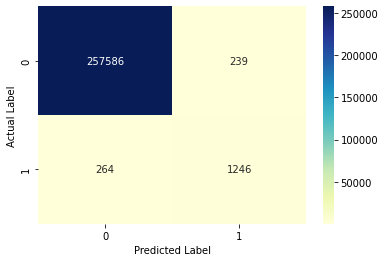

In [ ]:
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
bgc1 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc1.fit(X_train_smote, y_train_smote)
y_pred = bgc1.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of bagging Model before SMOT')
metrics(y_test, y_pred.round())
rf_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


# **Testing Bagging Classifier Model on Fraud_test.csv**

Evaluation of bagging Classifier Model after SMOT on Fraud_test.csv
Accuracy: 0.99782
Precision: 0.71707
Recall: 0.72075
F1-score: 0.71890


Text(0.5, 15.0, 'Predicted Label')

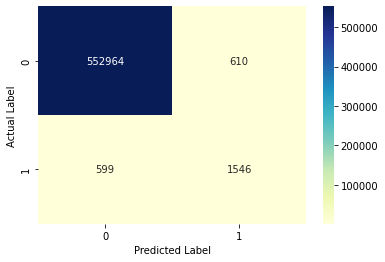

In [ ]:
y_pred_T = bgc1.predict(X_T)
cnf_matrix = confusion_matrix(y_T, y_pred_T)
print('Evaluation of bagging Classifier Model after SMOT on Fraud_test.csv')
metrics(y_T, y_pred_T.round())
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')